In [115]:
#Import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

In [116]:
TSLA = pd.read_csv("./Database/Pre_Processed_AMZN.csv")

In [117]:
TSLA.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,1/4/2010,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
1,1/5/2010,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2,1/6/2010,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
3,1/7/2010,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
4,1/8/2010,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [137]:
#Read data from csv file
df = pd.read_csv("./Database/Pre_Processed_AMZN.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj. Close,Volume
0,1/4/2010,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
1,1/5/2010,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2,1/6/2010,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
3,1/7/2010,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
4,1/8/2010,6.5280,6.6840,6.4515,6.6760,6.6760,196610000
5,1/11/2010,6.6310,6.6400,6.4605,6.5155,6.5155,175588000
6,1/12/2010,6.4495,6.4910,6.3275,6.3675,6.3675,181926000
7,1/13/2010,6.3950,6.4855,6.2875,6.4555,6.4555,214464000
8,1/14/2010,6.4570,6.5190,6.3200,6.3675,6.3675,195498000
9,1/15/2010,6.4590,6.4825,6.3530,6.3570,6.3570,307530000


In [138]:
#Drop no-meaning fields
df = df.drop(columns=['Date','Adj. Close'])
df.head(10)

,Open,High,Low,Close,Volume
0,6.8125,6.8305,6.6570,6.6950,151998000
1,6.6715,6.7740,6.5905,6.7345,177038000
2,6.7300,6.7365,6.5825,6.6125,143576000
3,6.6005,6.6160,6.4400,6.5000,220604000
4,6.5280,6.6840,6.4515,6.6760,196610000
5,6.6310,6.6400,6.4605,6.5155,175588000
6,6.4495,6.4910,6.3275,6.3675,181926000
7,6.3950,6.4855,6.2875,6.4555,214464000
8,6.4570,6.5190,6.3200,6.3675,195498000
9,6.4590,6.4825,6.3530,6.3570,307530000


In [139]:
df

,Open,High,Low,Close,Volume
0,6.812500,6.830500,6.657000,6.695000,151998000
1,6.671500,6.774000,6.590500,6.734500,177038000
2,6.730000,6.736500,6.582500,6.612500,143576000
3,6.600500,6.616000,6.440000,6.500000,220604000
4,6.528000,6.684000,6.451500,6.676000,196610000
...,...,...,...,...,...
2762,160.141998,161.100006,159.003998,160.326004,47388000
2763,160.250000,160.506500,159.208496,159.263504,41876000
2764,159.695007,160.100006,158.449997,158.634506,29038000
2765,159.699997,165.199997,158.634506,164.197998,113736000


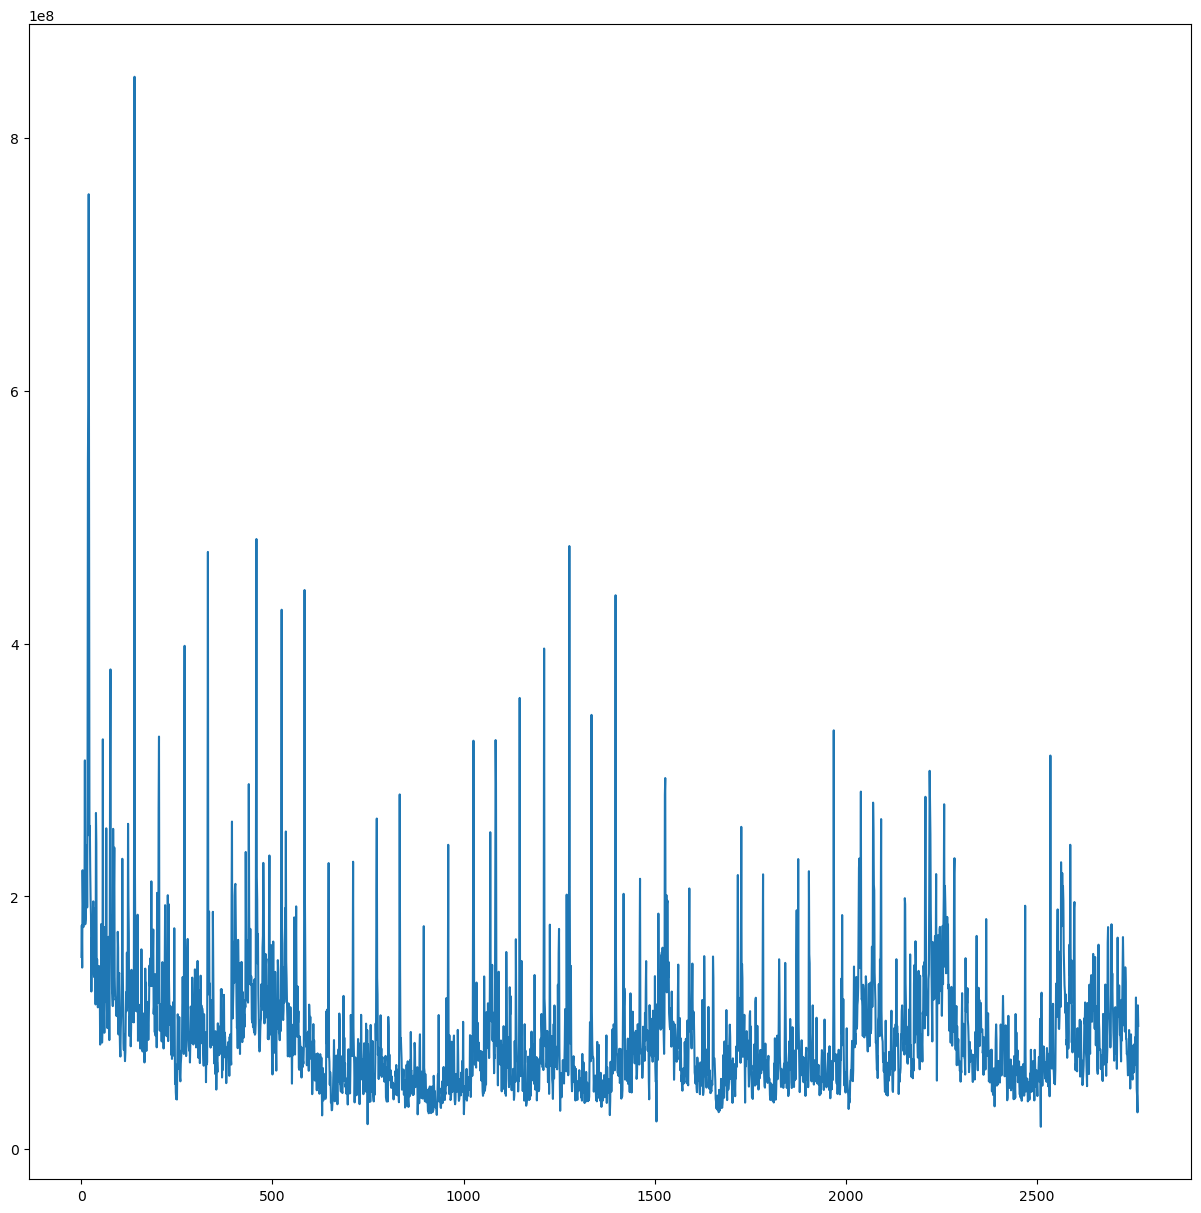

In [140]:
#Visualize volume
plt.figure(figsize=(15,15))
plt.plot(df['Volume'][0:5000])

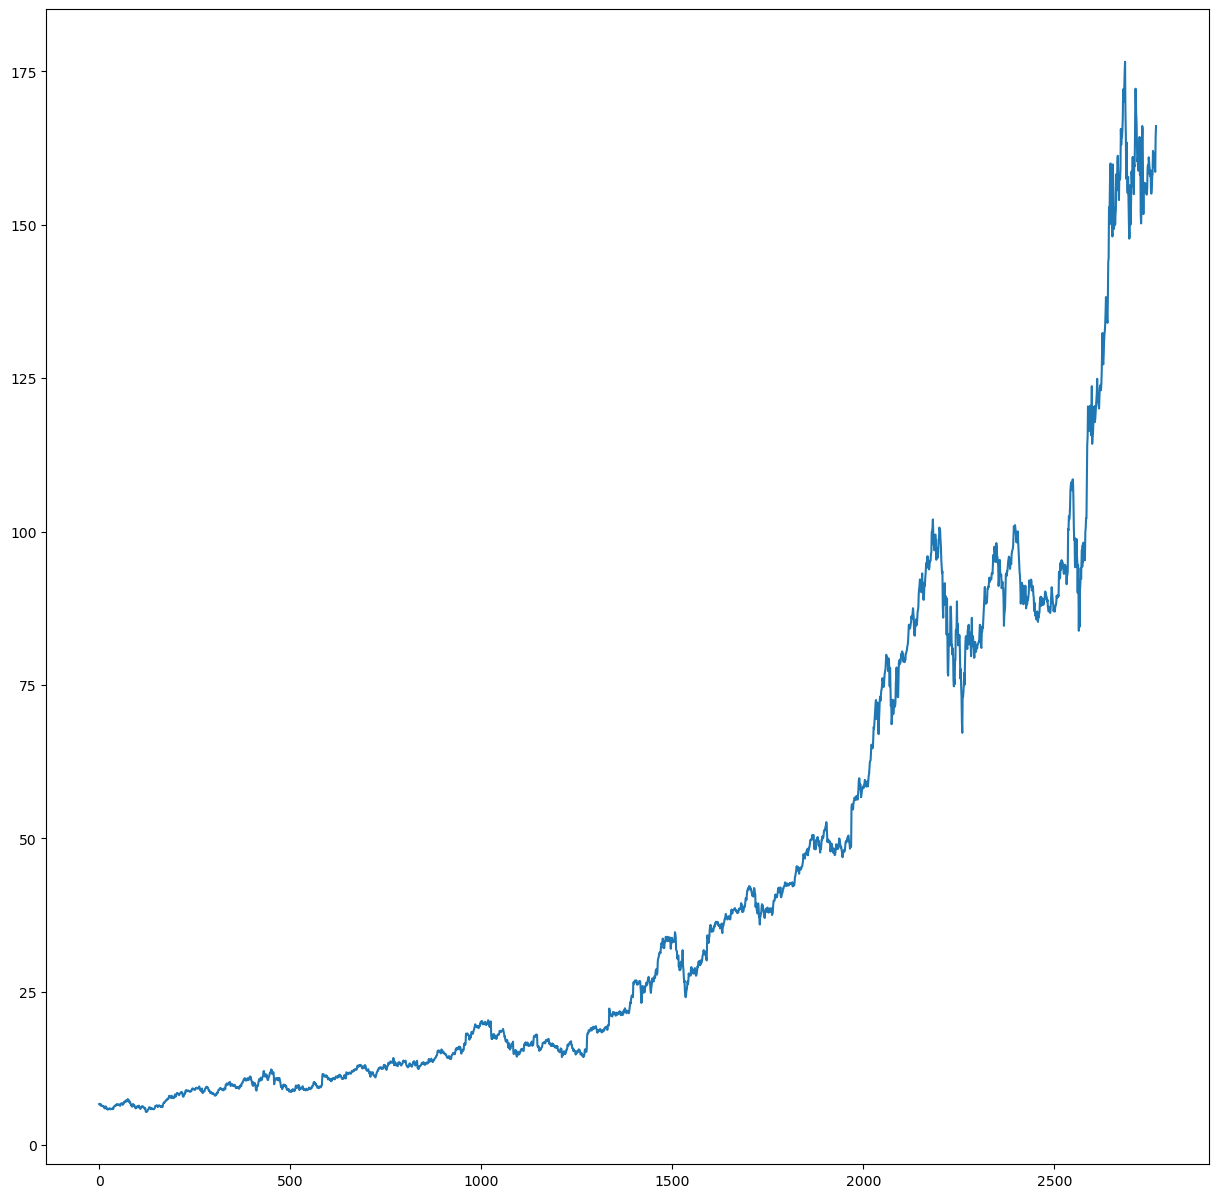

In [141]:
#Visualize close
plt.figure(figsize=(15,15))
plt.plot(df['Close'])

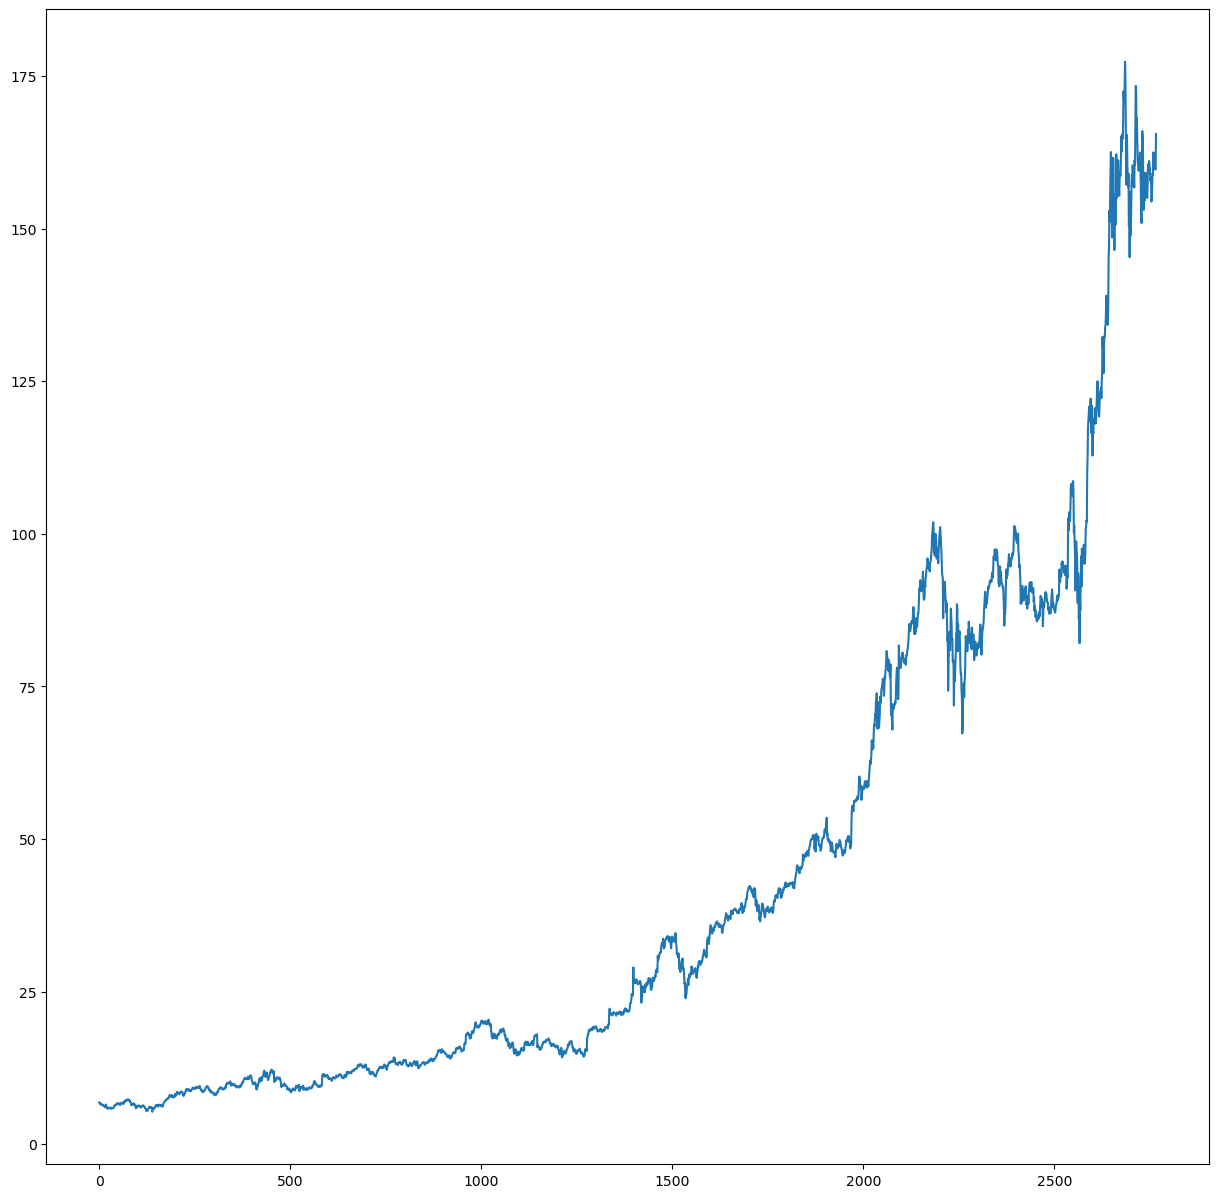

In [142]:
#Visualize Open
plt.figure(figsize=(15,15))
plt.plot(df['Open'])

In [143]:
#Shape of Close data
X_c = df['Close']
print(X_c.shape)

(2767,)


In [144]:
#Scaler to normalization
scaler = MinMaxScaler(feature_range=(0, 1))

def getPastSequenceData(df,timestep):
    X=[]
    y=[]
    p = scaler.fit_transform(np.array(df['Close']).reshape(-1,1)) 
    for i in range(1,len(df)-timestep,timestep):
        vals=np.array(p[i-1:i+timestep-1])
        temp=vals
        X.append(temp)
        y.append(p[i+timestep-1])
    return X,y

In [145]:
#Time step to extract features
time_step = 7

#Get features
X,Y=getPastSequenceData(df,time_step)
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
Y=np.array(Y)

In [146]:
print("After getting features:")
print(X.shape) #features
print(Y.shape) #labels
print(len(X)) #5108/7  #length

After getting features:
(395, 7, 1)
(395, 1)
395


In [147]:
#Spliting data
ntrain = int(len(X)*0.8)

#Train 80% - Test 20%
X_train, X_test = X[0:ntrain], X[ntrain:len(X)]
Y_train, Y_test = Y[0:ntrain], Y[ntrain:len(X)]

#After splitting
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(316, 7, 1) (79, 7, 1)
(316, 1) (79, 1)


In [148]:
for data in X_train:
  print(data)

[[0.0073886 ]
 [0.0076194 ]
 [0.00690655]
 [0.0062492 ]
 [0.00727758]
 [0.00633977]
 [0.00547498]]
[[0.00598918]
 [0.00547498]
 [0.00541363]
 [0.00555095]
 [0.0050163 ]
 [0.00526171]
 [0.00374543]]
[[0.00341821]
 [0.00317573]
 [0.00413107]
 [0.00508934]
 [0.00490821]
 [0.00299751]
 [0.0027784 ]]
[[0.00306471]
 [0.0021415 ]
 [0.00256512]
 [0.00240151]
 [0.0027521 ]
 [0.00255636]
 [0.00335394]]
[[0.00322831]
 [0.00260602]
 [0.00224959]
 [0.00276671]
 [0.0026031 ]
 [0.00274626]
 [0.0025213 ]]
[[0.00324584]
 [0.00280177]
 [0.0028602 ]
 [0.00465403]
 [0.00494326]
 [0.00504844]
 [0.00581973]]
[[0.00593075]
 [0.00628133]
 [0.00590445]
 [0.00639819]
 [0.00729511]
 [0.00678092]
 [0.00657933]]
[[0.00677215]
 [0.00664068]
 [0.00705554]
 [0.00635145]
 [0.00638651]
 [0.006033  ]
 [0.00567657]]
[[0.00763109]
 [0.0077275 ]
 [0.00774503]
 [0.00817158]
 [0.00793493]
 [0.006778  ]
 [0.00668451]]
[[0.00787358]
 [0.00767199]
 [0.00945122]
 [0.00918828]
 [0.00952133]
 [0.00921749]
 [0.01042117]]
[[0.010871

In [149]:
for data in X_test:
  print(data)

[[0.49997957]
 [0.50341824]
 [0.48559387]
 [0.48363933]
 [0.49102207]
 [0.48500368]
 [0.45447349]]
[[0.48893901]
 [0.44822431]
 [0.41786062]
 [0.41538901]
 [0.43513573]
 [0.45486204]
 [0.45486204]]
[[0.44383904]
 [0.44822431]
 [0.48114432]
 [0.48097487]
 [0.46856412]
 [0.44648304]
 [0.44482362]]
[[0.43542791]
 [0.44139663]
 [0.43379185]
 [0.41009223]
 [0.40517526]
 [0.4113894 ]
 [0.40710345]]
[[0.43026259]
 [0.43028889]
 [0.45843218]
 [0.45721097]
 [0.46206075]
 [0.48607296]
 [0.45570053]]
[[0.46469602]
 [0.4442276 ]
 [0.44770425]
 [0.44834994]
 [0.45428068]
 [0.45277314]
 [0.43335359]]
[[0.4126106 ]
 [0.42154176]
 [0.40506422]
 [0.3950579 ]
 [0.37069801]
 [0.36091374]
 [0.39799991]]
[[0.39529457]
 [0.40008007]
 [0.4070772 ]
 [0.41793364]
 [0.40658343]
 [0.42852721]
 [0.44433865]]
[[0.45224729]
 [0.453077  ]
 [0.45214208]
 [0.44756695]
 [0.44074511]
 [0.4575002 ]
 [0.46019391]]
[[0.46295185]
 [0.46382244]
 [0.44511575]
 [0.44740918]
 [0.4517652 ]
 [0.45633454]
 [0.4467869 ]]
[[0.433929

In [150]:
from keras.layers import Conv1D, Activation,MaxPooling1D,Flatten, GRU, AveragePooling1D, Dense, Dropout
from keras.models import Sequential

#Input các vecto 7X1
# 32*
#Build model
model=Sequential()
#Layer1 
model.add(Conv1D(32, 3, padding='same', input_shape=(time_step,1)))
model.add(Activation('relu'))

#Layer2
model.add(Conv1D(32, 3, padding='same'))
model.add(Activation('relu'))

#layer3 
model.add(AveragePooling1D(pool_size=2))

#layer4
model.add(Conv1D(64, 3, padding='same', input_shape=(time_step,1)))
model.add(Activation('relu'))

#layer5
model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))

#layer6
model.add(AveragePooling1D())

#Flatten
model.add(Flatten())
#Output
model.add(Dense(1))

#Summary model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 7, 32)             128       
                                                                 
 activation_20 (Activation)  (None, 7, 32)             0         
                                                                 
 conv1d_21 (Conv1D)          (None, 7, 32)             3104      
                                                                 
 activation_21 (Activation)  (None, 7, 32)             0         
                                                                 
 average_pooling1d_10 (Aver  (None, 3, 32)             0         
 agePooling1D)                                                   
                                                                 
 conv1d_22 (Conv1D)          (None, 3, 64)             6208      
                                                      

In [151]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Call back to save best model
monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="Mystockpred.hdf5", verbose=0, save_best_only=True)

In [152]:
import tensorflow as tf

#Training model - metric MSE
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train,Y_train,validation_split=0.2,batch_size = 128, callbacks=[checkpointer],verbose=1,epochs = 512)

Epoch 1/512
2/2 [==============================] - 1s 239ms/step - loss: 0.0065 - val_loss: 0.0917
Epoch 2/512
2/2 [==============================] - 0s 57ms/step - loss: 0.0040 - val_loss: 0.0658
Epoch 3/512
2/2 [==============================] - 0s 67ms/step - loss: 0.0021 - val_loss: 0.0400


C:\Users\Win10\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/512
2/2 [==============================] - 0s 57ms/step - loss: 0.0014 - val_loss: 0.0194
Epoch 5/512
2/2 [==============================] - 0s 66ms/step - loss: 0.0016 - val_loss: 0.0106
Epoch 6/512
2/2 [==============================] - 0s 62ms/step - loss: 0.0015 - val_loss: 0.0100
Epoch 7/512
2/2 [==============================] - 0s 37ms/step - loss: 8.9408e-04 - val_loss: 0.0127
Epoch 8/512
2/2 [==============================] - 0s 41ms/step - loss: 5.2486e-04 - val_loss: 0.0139
Epoch 9/512
2/2 [==============================] - 0s 39ms/step - loss: 5.2863e-04 - val_loss: 0.0113
Epoch 10/512
2/2 [==============================] - 0s 70ms/step - loss: 4.4528e-04 - val_loss: 0.0055
Epoch 11/512
2/2 [==============================] - 0s 67ms/step - loss: 2.0579e-04 - val_loss: 8.0108e-04
Epoch 12/512
2/2 [==============================] - 0s 60ms/step - loss: 5.5607e-05 - val_loss: 5.4951e-04
Epoch 13/512
2/2 [==============================] - 0s 35ms/step - loss: 1.5497e-04

2/2 [==============================] - 0s 35ms/step - loss: 1.5158e-05 - val_loss: 2.5434e-04
Epoch 82/512
2/2 [==============================] - 0s 35ms/step - loss: 1.5126e-05 - val_loss: 2.4764e-04
Epoch 83/512
2/2 [==============================] - 0s 34ms/step - loss: 1.5266e-05 - val_loss: 2.3098e-04
Epoch 84/512
2/2 [==============================] - 0s 34ms/step - loss: 1.5331e-05 - val_loss: 2.5123e-04
Epoch 85/512
2/2 [==============================] - 0s 34ms/step - loss: 1.5096e-05 - val_loss: 2.4761e-04
Epoch 86/512
2/2 [==============================] - 0s 34ms/step - loss: 1.5049e-05 - val_loss: 2.3829e-04
Epoch 87/512
2/2 [==============================] - 0s 35ms/step - loss: 1.5066e-05 - val_loss: 2.3279e-04
Epoch 88/512
2/2 [==============================] - 0s 34ms/step - loss: 1.5070e-05 - val_loss: 2.4142e-04
Epoch 89/512
2/2 [==============================] - 0s 33ms/step - loss: 1.5092e-05 - val_loss: 2.4171e-04
Epoch 90/512
2/2 [==============================] 

2/2 [==============================] - 0s 33ms/step - loss: 1.4381e-05 - val_loss: 2.2042e-04
Epoch 158/512
2/2 [==============================] - 0s 34ms/step - loss: 1.4237e-05 - val_loss: 2.4081e-04
Epoch 159/512
2/2 [==============================] - 0s 34ms/step - loss: 1.4298e-05 - val_loss: 2.3643e-04
Epoch 160/512
2/2 [==============================] - 0s 34ms/step - loss: 1.4390e-05 - val_loss: 2.1841e-04
Epoch 161/512
2/2 [==============================] - 0s 35ms/step - loss: 1.4228e-05 - val_loss: 2.3149e-04
Epoch 162/512
2/2 [==============================] - 0s 34ms/step - loss: 1.4193e-05 - val_loss: 2.4176e-04
Epoch 163/512
2/2 [==============================] - 0s 36ms/step - loss: 1.4601e-05 - val_loss: 2.2949e-04
Epoch 164/512
2/2 [==============================] - 0s 34ms/step - loss: 1.4178e-05 - val_loss: 2.4233e-04
Epoch 165/512
2/2 [==============================] - 0s 34ms/step - loss: 1.4413e-05 - val_loss: 2.4932e-04
Epoch 166/512
2/2 [=======================

Epoch 233/512
2/2 [==============================] - 0s 36ms/step - loss: 1.3322e-05 - val_loss: 1.9063e-04
Epoch 234/512
2/2 [==============================] - 0s 38ms/step - loss: 1.3333e-05 - val_loss: 1.8494e-04
Epoch 235/512
2/2 [==============================] - 0s 36ms/step - loss: 1.3530e-05 - val_loss: 2.0939e-04
Epoch 236/512
2/2 [==============================] - 0s 37ms/step - loss: 1.3969e-05 - val_loss: 2.4703e-04
Epoch 237/512
2/2 [==============================] - 0s 36ms/step - loss: 1.3347e-05 - val_loss: 1.8967e-04
Epoch 238/512
2/2 [==============================] - 0s 34ms/step - loss: 1.4123e-05 - val_loss: 1.8387e-04
Epoch 239/512
2/2 [==============================] - 0s 35ms/step - loss: 1.3641e-05 - val_loss: 2.5919e-04
Epoch 240/512
2/2 [==============================] - 0s 34ms/step - loss: 1.3960e-05 - val_loss: 2.0661e-04
Epoch 241/512
2/2 [==============================] - 0s 34ms/step - loss: 1.3172e-05 - val_loss: 1.6625e-04
Epoch 242/512
2/2 [=========

Epoch 309/512
2/2 [==============================] - 0s 34ms/step - loss: 1.2375e-05 - val_loss: 1.8450e-04
Epoch 310/512
2/2 [==============================] - 0s 34ms/step - loss: 1.2443e-05 - val_loss: 1.5821e-04
Epoch 311/512
2/2 [==============================] - 0s 34ms/step - loss: 1.2487e-05 - val_loss: 2.1982e-04
Epoch 312/512
2/2 [==============================] - 0s 39ms/step - loss: 1.2186e-05 - val_loss: 1.7384e-04
Epoch 313/512
2/2 [==============================] - 0s 49ms/step - loss: 1.2258e-05 - val_loss: 1.8368e-04
Epoch 314/512
2/2 [==============================] - 0s 34ms/step - loss: 1.1849e-05 - val_loss: 2.0900e-04
Epoch 315/512
2/2 [==============================] - 0s 35ms/step - loss: 1.2307e-05 - val_loss: 1.6843e-04
Epoch 316/512
2/2 [==============================] - 0s 35ms/step - loss: 1.2062e-05 - val_loss: 1.8606e-04
Epoch 317/512
2/2 [==============================] - 0s 33ms/step - loss: 1.1869e-05 - val_loss: 1.7570e-04
Epoch 318/512
2/2 [=========

Epoch 385/512
2/2 [==============================] - 0s 36ms/step - loss: 1.1940e-05 - val_loss: 1.3151e-04
Epoch 386/512
2/2 [==============================] - 0s 44ms/step - loss: 1.0425e-05 - val_loss: 1.9403e-04
Epoch 387/512
2/2 [==============================] - 0s 38ms/step - loss: 1.1362e-05 - val_loss: 1.2533e-04
Epoch 388/512
2/2 [==============================] - 0s 31ms/step - loss: 1.0825e-05 - val_loss: 1.7510e-04
Epoch 389/512
2/2 [==============================] - 0s 35ms/step - loss: 1.0557e-05 - val_loss: 1.4808e-04
Epoch 390/512
2/2 [==============================] - 0s 35ms/step - loss: 1.0809e-05 - val_loss: 1.4273e-04
Epoch 391/512
2/2 [==============================] - 0s 34ms/step - loss: 1.0401e-05 - val_loss: 1.3738e-04
Epoch 392/512
2/2 [==============================] - 0s 34ms/step - loss: 1.0381e-05 - val_loss: 1.5487e-04
Epoch 393/512
2/2 [==============================] - 0s 36ms/step - loss: 1.0481e-05 - val_loss: 1.4219e-04
Epoch 394/512
2/2 [=========

Epoch 461/512
2/2 [==============================] - 0s 31ms/step - loss: 9.6784e-06 - val_loss: 1.7064e-04
Epoch 462/512
2/2 [==============================] - 0s 35ms/step - loss: 9.3859e-06 - val_loss: 1.0057e-04
Epoch 463/512
2/2 [==============================] - 0s 34ms/step - loss: 9.9206e-06 - val_loss: 1.4730e-04
Epoch 464/512
2/2 [==============================] - 0s 34ms/step - loss: 9.3650e-06 - val_loss: 1.1773e-04
Epoch 465/512
2/2 [==============================] - 0s 34ms/step - loss: 1.0117e-05 - val_loss: 1.4639e-04
Epoch 466/512
2/2 [==============================] - 0s 32ms/step - loss: 1.0497e-05 - val_loss: 1.1992e-04
Epoch 467/512
2/2 [==============================] - 0s 33ms/step - loss: 9.6558e-06 - val_loss: 1.1602e-04
Epoch 468/512
2/2 [==============================] - 0s 32ms/step - loss: 8.8362e-06 - val_loss: 1.5023e-04
Epoch 469/512
2/2 [==============================] - 0s 34ms/step - loss: 9.9371e-06 - val_loss: 9.8774e-05
Epoch 470/512
2/2 [=========

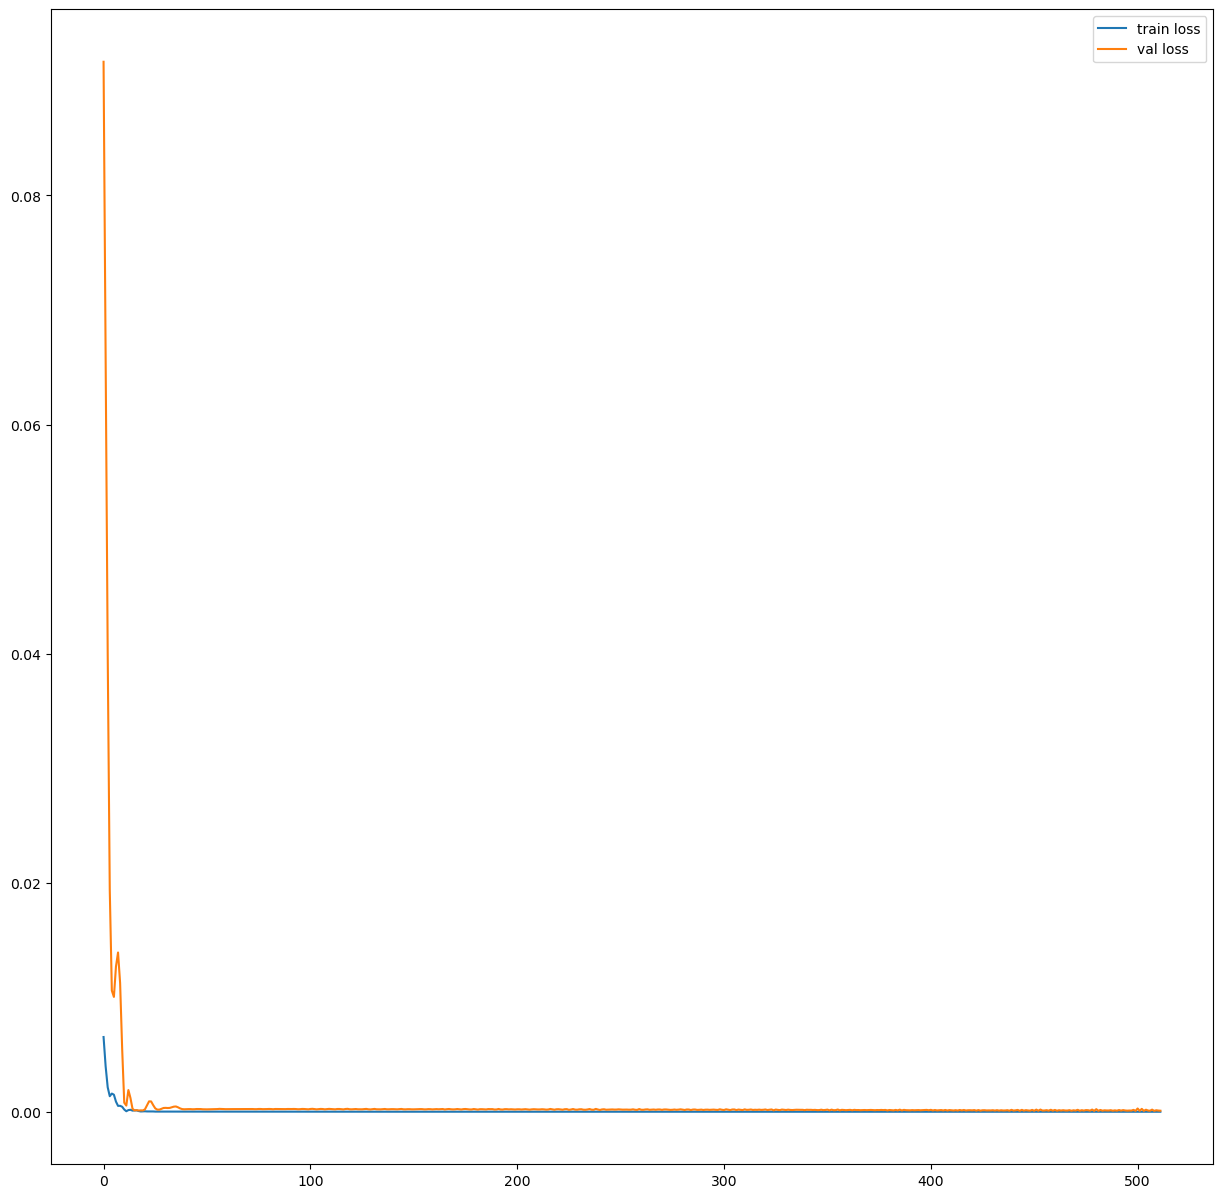

In [153]:
#Draw chart of train and valid loss
plt.figure(figsize=(15,15))
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()

In [154]:
import math
from sklearn.metrics import mean_squared_error

#make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test) #20%

#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(Y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(Y_test)

3/3 [==============================] - 0s 9ms/step


Average Training Difference: 0.55 
Average Testing Difference: 3.44 


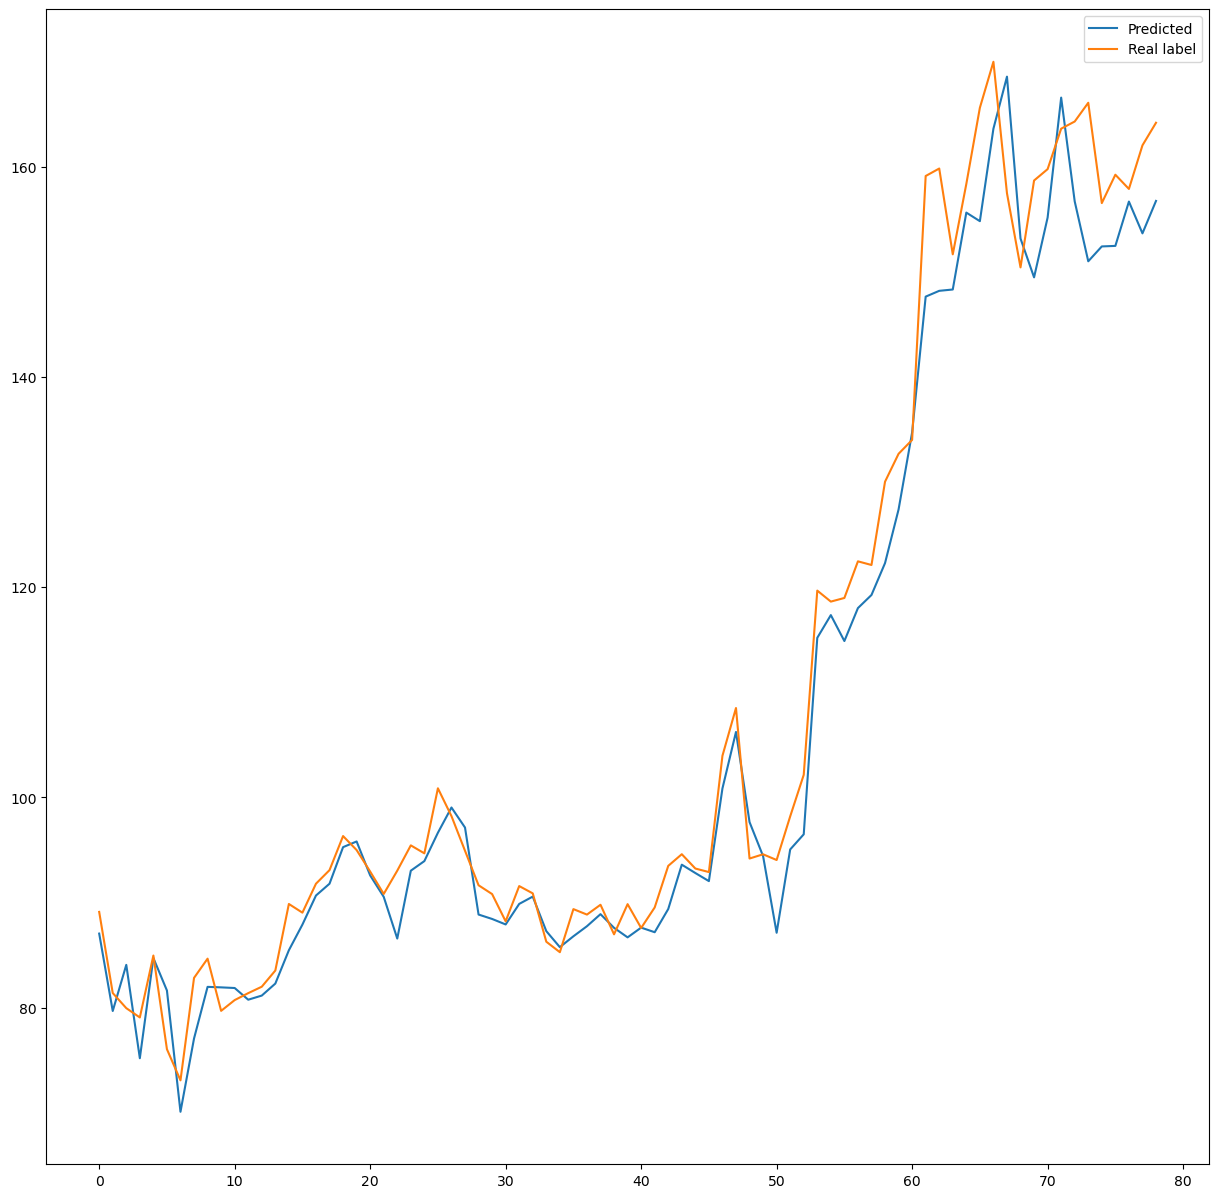

In [155]:
trainScore=0
testScore=0

#calculate root mean squared error
for i in range (trainY.shape[0]):
    trainScore += math.sqrt(mean_squared_error(trainY[i], trainPredict[i]))
trainScore=trainScore/trainY.shape[0]

for i in range (testY.shape[0]):
    testScore += math.sqrt(mean_squared_error(testY[i],testPredict[i]))
testScore=testScore/testY.shape[0]

#MSE score
print('Average Training Difference: %.2f ' % (trainScore))
print('Average Testing Difference: %.2f ' % (testScore))

#Draw prediction and comparing with real labels
plt.figure(figsize=(15,15))
plt.plot(testPredict, label = 'Predicted')
plt.plot(testY, label = 'Real label')
plt.legend()
plt.show()

In [156]:
#Examaple:
a = np.array([[900],[910],[911],[1102],[1156],[1129],[1160]])
#7 ngày

a = scaler.fit_transform(a[:])
a = np.reshape(a,(1,7,1))
aP = model.predict(a)

# invert predictions
aP = scaler.inverse_transform(aP)
print("Predicted: ", aP)

1/1 [==============================] - 0s 22ms/step
Predicted:  [[1090.6011]]


In [157]:
print(testPredict)

[[ 87.04645 ]
 [ 79.68007 ]
 [ 84.070465]
 [ 75.18623 ]
 [ 84.72014 ]
 [ 81.62943 ]
 [ 70.090805]
 [ 77.06206 ]
 [ 81.97643 ]
 [ 81.92836 ]
 [ 81.86766 ]
 [ 80.75467 ]
 [ 81.14688 ]
 [ 82.28961 ]
 [ 85.46048 ]
 [ 87.90245 ]
 [ 90.66785 ]
 [ 91.79158 ]
 [ 95.27025 ]
 [ 95.81164 ]
 [ 92.582794]
 [ 90.54415 ]
 [ 86.57294 ]
 [ 93.03045 ]
 [ 93.944016]
 [ 96.64182 ]
 [ 99.04383 ]
 [ 97.13736 ]
 [ 88.85831 ]
 [ 88.43825 ]
 [ 87.9151  ]
 [ 89.869514]
 [ 90.56624 ]
 [ 87.2797  ]
 [ 85.75577 ]
 [ 86.78804 ]
 [ 87.74721 ]
 [ 88.89487 ]
 [ 87.592896]
 [ 86.6865  ]
 [ 87.61429 ]
 [ 87.17608 ]
 [ 89.38424 ]
 [ 93.60284 ]
 [ 92.8078  ]
 [ 92.03915 ]
 [100.85552 ]
 [106.23263 ]
 [ 97.65693 ]
 [ 94.41677 ]
 [ 87.12569 ]
 [ 95.05053 ]
 [ 96.49157 ]
 [115.188095]
 [117.351364]
 [114.882195]
 [118.01733 ]
 [119.264145]
 [122.29785 ]
 [127.40326 ]
 [134.73259 ]
 [147.65308 ]
 [148.20532 ]
 [148.33195 ]
 [155.64925 ]
 [154.83353 ]
 [163.6298  ]
 [168.5834  ]
 [153.18044 ]
 [149.48706 ]
 [155.17241 ]
 [166.

In [158]:
print(len(testY))

79


In [159]:
a = np.arange(0,79)
a = np.asarray(a, dtype=np.int64).reshape((-1,1))
b = testY
print(b.shape)
a = np.concatenate((a,b), axis=1)
a = np.concatenate((a,testPredict), axis=1)
myresult = pd.DataFrame(a, columns=["Week", "Price","Prediction Price"])

(79, 1)


In [160]:
myresult

,Week,Price,Prediction Price
0,0.0,89.108498,87.046448
1,1.0,81.389999,79.680069
2,2.0,79.950500,84.070465
3,3.0,79.066498,75.186234
4,4.0,84.959503,84.720139
...,...,...,...
74,74.0,156.552994,152.430023
75,75.0,159.253494,152.480804
76,76.0,157.899994,156.698822
77,77.0,162.048004,153.673401


In [161]:
# Saving result
myresult.to_csv("AMZN_Prediction.csv", index=False)

7/7 [==============================] - 0s 4ms/step
221
Average All dataset Difference: 5.81 


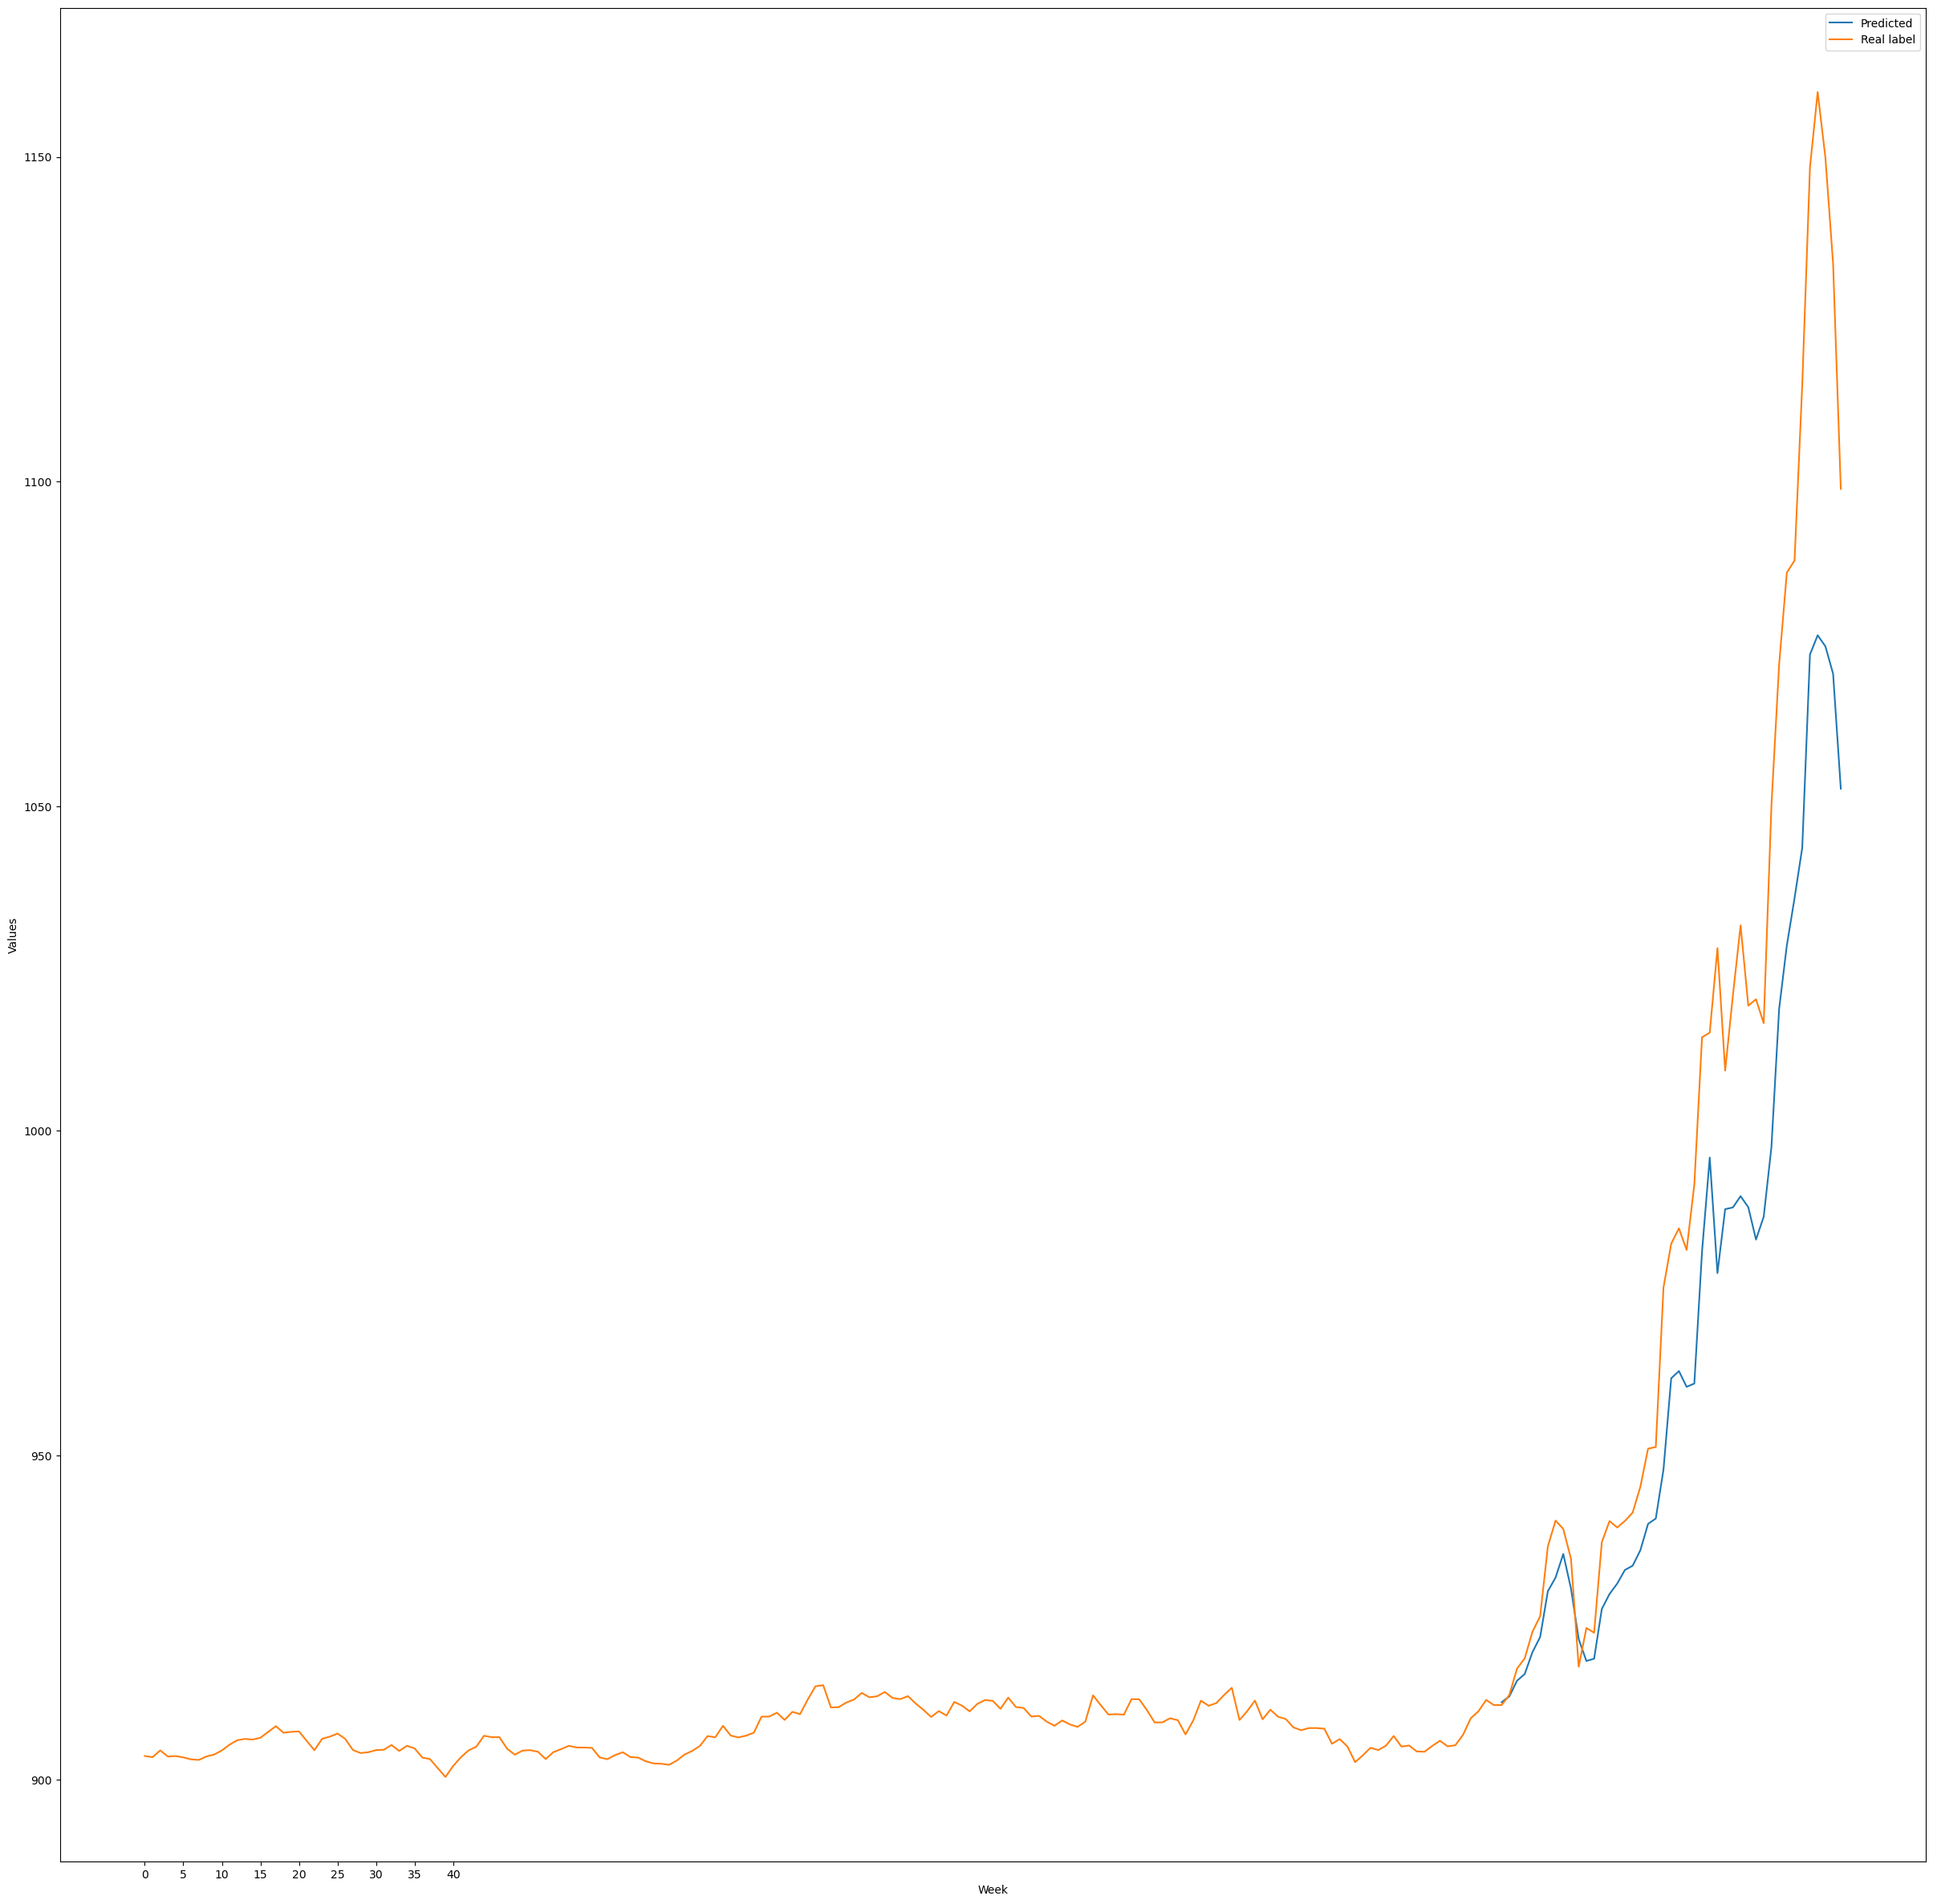

In [87]:
import math
from sklearn.metrics import mean_squared_error

#make predictions for all
allPredict = model.predict(X)
print(len(allPredict))
#invert predictions
allPredict = scaler.inverse_transform(allPredict)
allY = scaler.inverse_transform(Y)

#calculate root mean squared error for all dataset
allScore=0
for i in range (Y.shape[0]):
    allScore += math.sqrt(mean_squared_error(allPredict[i], allY[i]))
allScore=allScore/Y.shape[0]

#MSE score(sai số trên tổng thể dữ liệu nha)
print('Average All dataset Difference: %.2f ' % (allScore))

new1 = []
for i in range(176,221):
  new1.append(i)
new1 = np.array(new1)
plt.figure(figsize=(30,30))
plt.plot(new1,allPredict[176:], label = 'Predicted')
plt.plot(allY, label = 'Real label')
plt.xticks(np.arange(0, 45, 5))

plt.ylabel("Values")
plt.xlabel("Week")

plt.legend()
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rms = mean_squared_error(allPredict, allY, squared=False)
mae = mean_absolute_error(allPredict, allY)
print('MSE: ', allScore)
print("RMSE value: ", rms)
print("MAE value: ", mae)

MSE:  5.812636171317419
RMSE value:  15.887936905885919
MAE value:  5.812636171317418
